In [2]:
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from dadapy._utils.stochastic_minimization_hamming import *
sys.path.append('../')
from paths import *

In [8]:
L = 30

Ns = 5000
Nsteps = int(1E6)
delta = 5E-4
alphamin = 0
alphamax = .1
histfolder = f'distances/results/hist/'

In [27]:
T_list = np.arange(1.8,3+eps,.1)

ID_BID = np.zeros(shape=(len(T_list),))
ID_GRIDE = np.zeros(shape=ID_BID.shape)
ID_FCI = np.zeros(shape=ID_BID.shape)

for T_id,T in enumerate(T_list):
  ### BID
  H = Hamming()
  H.D_histogram(
                T=T,
                L=L,
                Ns=Ns,
                resultsfolder=histfolder,
                )
  optfolder0 = f'BID/results/opt/L{L}/T{T:.2f}/'
  B = BID(H,
          alphamin=alphamin,
          alphamax=alphamax,
          seed=1,
          delta=delta,
          Nsteps=Nsteps,
          optfolder0=optfolder0,
          )
  (_,ID_BID[T_id],_,_,) = B.load_results()
  ### GRIDE
  k = 3
  resultsfolder = makefolder(base=f'Gride/results/gride/',
                          L=L,
                          T=T,
                          )
  ids_gride,ids_err_gride,rs_gride = np.loadtxt(resultsfolder+'gride.txt',unpack=True)
  ID_GRIDE[T_id] = ids_gride[k]
  ### FCI
  resultsfolder = makefolder(base=f'FCI/results/FCI/',
                          create_folder=False,
                          precision=2,
                          global_flag=1,
                          L=L,
                          T=float(T),
                          M_flag=1,
                          )
  ID_FCI[T_id], x0, err = np.loadtxt(resultsfolder + 'FCI_fit.txt')

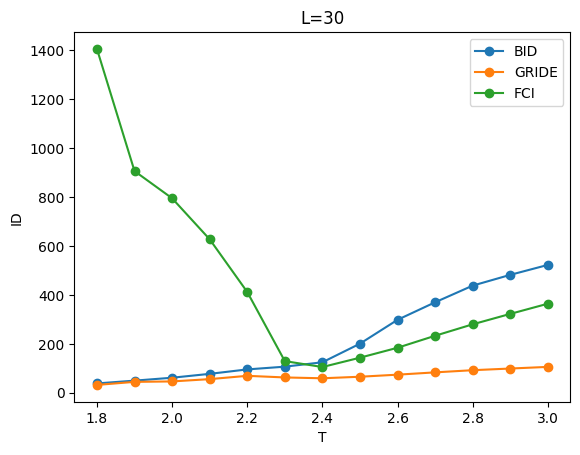

In [33]:
fig,ax = plt.subplots(1)

ax.plot(T_list,ID_BID,'o-',label='BID')
ax.plot(T_list,ID_GRIDE,'o-',label='GRIDE')
ax.plot(T_list,ID_FCI,'o-',label='FCI')

ax.legend()
# ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('ID')
plt.title(f'{L=}')
plt.show()